In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist

2023-08-13 14:33:27.058743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Importing the dataset
data = pd.read_csv('train.csv')

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [13]:
Y_train

array([2, 2, 0, ..., 3, 9, 0])

In [14]:
X_train[:,0].shape

(784,)

In [28]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [29]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 3 4 ... 4 4 9] [6 2 1 ... 2 5 7]
0.11714634146341464
Iteration:  10
[2 3 0 ... 8 4 9] [6 2 1 ... 2 5 7]
0.19441463414634147
Iteration:  20
[2 3 0 ... 8 4 9] [6 2 1 ... 2 5 7]
0.3057560975609756
Iteration:  30
[2 3 1 ... 8 4 9] [6 2 1 ... 2 5 7]
0.38953658536585367
Iteration:  40
[8 3 1 ... 4 4 9] [6 2 1 ... 2 5 7]
0.45858536585365856
Iteration:  50
[2 3 1 ... 4 4 9] [6 2 1 ... 2 5 7]
0.5081951219512195
Iteration:  60
[2 3 1 ... 4 4 7] [6 2 1 ... 2 5 7]
0.5471463414634147
Iteration:  70
[6 3 1 ... 4 4 7] [6 2 1 ... 2 5 7]
0.5786829268292683
Iteration:  80
[6 3 1 ... 4 4 7] [6 2 1 ... 2 5 7]
0.6036341463414634
Iteration:  90
[6 3 1 ... 4 4 7] [6 2 1 ... 2 5 7]
0.6264634146341463
Iteration:  100
[6 3 1 ... 4 4 7] [6 2 1 ... 2 5 7]
0.6454634146341464
Iteration:  110
[6 3 1 ... 4 4 7] [6 2 1 ... 2 5 7]
0.6629268292682927
Iteration:  120
[6 3 1 ... 4 4 7] [6 2 1 ... 2 5 7]
0.6770731707317074
Iteration:  130
[6 3 1 ... 4 4 7] [6 2 1 ... 2 5 7]
0.6902926829268292
Iteration:  1

In [30]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


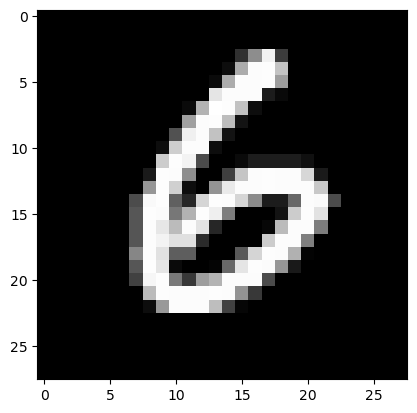

Prediction:  [2]
Label:  2


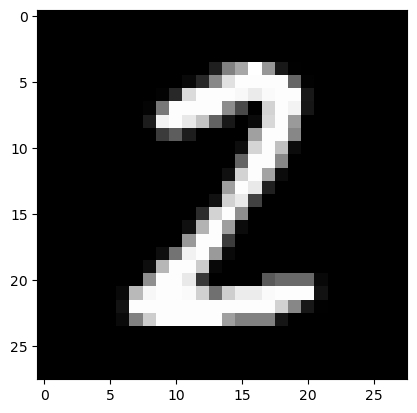

Prediction:  [1]
Label:  1


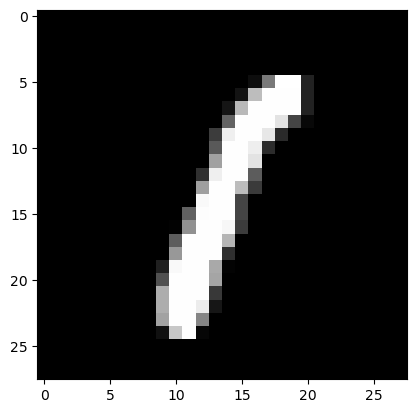

Prediction:  [1]
Label:  1


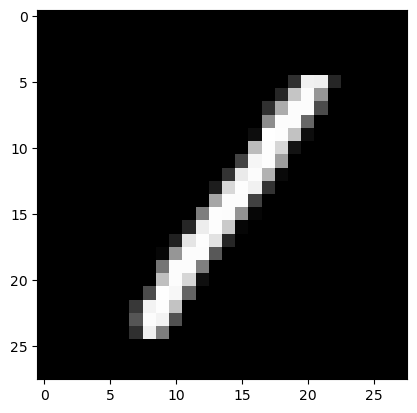

In [31]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [32]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 6 8 8 9 2 7 9 1 1 7 0 6 1 2 1 3 2 5 1 0 3 1 0 7 4 1 9 6 9 2 2 0 3 7 7 6
 3 5 6 2 1 7 4 1 0 1 9 4 7 6 3 5 1 1 6 3 0 1 1 2 7 0 0 5 9 8 2 3 8 3 1 4 6
 9 4 3 8 8 0 0 2 9 6 3 9 7 5 5 2 1 9 9 7 9 0 7 0 5 6 3 0 8 5 8 8 8 3 8 3 1
 9 6 0 2 6 0 3 2 7 8 2 8 4 2 0 1 1 5 7 0 0 7 8 9 3 9 4 0 6 3 1 7 7 7 5 5 4
 7 9 7 7 4 7 5 7 1 7 3 1 0 5 0 1 4 8 9 3 7 5 6 9 9 8 1 1 2 1 8 1 1 6 5 6 5
 7 6 7 9 6 8 2 8 3 4 9 2 9 3 2 4 6 8 2 8 2 3 4 8 4 2 4 5 8 8 2 1 9 4 1 9 4
 8 6 8 0 0 6 6 4 6 6 8 7 8 7 2 6 2 0 6 7 8 3 3 6 0 6 5 8 3 4 1 6 0 9 6 9 6
 3 8 6 7 0 2 1 4 7 0 7 3 4 6 1 0 4 2 7 6 8 7 0 8 6 0 1 4 2 8 2 1 2 1 2 6 8
 7 5 7 3 9 8 8 4 4 1 7 2 9 3 4 6 1 6 0 5 7 5 4 7 3 9 4 9 0 8 6 5 6 4 6 6 4
 3 2 2 8 2 5 9 3 6 9 0 2 1 6 5 7 8 8 2 5 0 6 5 8 3 0 9 2 4 3 3 1 1 7 7 7 6
 4 9 4 9 7 1 0 5 9 6 3 7 4 0 2 0 9 7 9 1 2 2 9 3 1 3 4 5 6 4 0 8 8 3 7 3 5
 3 1 5 7 3 0 1 2 8 2 1 6 1 8 0 3 1 5 5 7 0 1 8 3 0 5 4 3 6 2 1 3 8 9 0 3 0
 7 1 6 6 8 0 2 6 2 7 5 3 2 0 0 2 2 9 4 6 3 3 3 4 9 0 3 3 1 8 4 8 2 4 6 0 5
 3 7 0 8 1 5 8 6 7 6 7 4 

0.854